In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [34]:
import utils



def fluid_solution(N, W, pmf_cust, pmf_serv):
    M11 = cp.Variable()
    M12 = cp.Variable()
    M22 = cp.Variable()
    M21 = cp.Variable()
    print(W)
    constraints = []                          
    constraints.append( M11 + M12 == pmf_cust[0] )
    constraints.append( M21 + M22 == pmf_cust[1] )
    constraints.append( M11 + M21 == pmf_serv[0] )
    constraints.append( M12 + M22 == pmf_serv[1] )

    constraints.append( M11>=0 )
    constraints.append( M12>=0 )
    constraints.append( M21>=0 )
    constraints.append( M22>=0 )

    constraints.append( M11<=1 )
    constraints.append( M12<=1 )
    constraints.append( M21<=1 )
    constraints.append( M22<=1 )                 

    objective = cp.Minimize(  W[0][0]*M11 + W[1][0]*M21 + W[0][1]*M12 + W[1][1]*M22 )
    problem = cp.Problem(objective, constraints)
    problem.solve()  
    print(problem)
    Mstar = np.zeros(shape=(2,2))
    Mstar[0][0] = M11.value
    Mstar[0][1] = M12.value
    Mstar[1][0] = M21.value
    Mstar[1][1] = M22.value
    return({"X": Mstar, "Cost": problem.value })

def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = fluid_solution(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
    print("\nFluid Solution:\n")
    print(fluid_sol)
    return([Ex,fluid_sol])

In [35]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 6.158
[[ 2.1 10. ]
 [ 5.   3.5]]
minimize 2.1 @ var1156 + 5.0 @ var1159 + 10.0 @ var1157 + 3.5 @ var1158
subject to var1156 + var1157 == 0.6
           var1159 + var1158 == 0.4
           var1156 + var1159 == 0.3
           var1157 + var1158 == 0.7
           0.0 <= var1156
           0.0 <= var1157
           0.0 <= var1159
           0.0 <= var1158
           var1156 <= 1.0
           var1157 <= 1.0
           var1159 <= 1.0
           var1158 <= 1.0

Fluid Solution:

{'X': array([[3.0000000e-01, 3.0000000e-01],
       [2.9733875e-11, 4.0000000e-01]]), 'Cost': 5.030000000279436}


Expected cost for c = 0 case: 6.158
[[ 2.1 10. ]
 [ 5.   3.5]]
minimize 2.1 @ var1301 + 5.0 @ var1304 + 10.0 @ var1302 + 3.5 @ var1303
subject to var1301 + var1302 == 0.6
           var1304 + var1303 == 0.4
           var1301 + var1304 == 0.3
           var1302 + var1303 == 0.7
           0.0 <= var1301
           0.0 <= var1302
           0.0 <= var1304
           0.0 <= var1303
           var1301 <= 1.0
           var1302 <= 1.0
           var1304 <= 1.0
           var1303 <= 1.0

Fluid Solution:

{'X': array([[3.0000000e-01, 3.0000000e-01],
       [2.9733875e-11, 4.0000000e-01]]), 'Cost': 5.030000000279436}


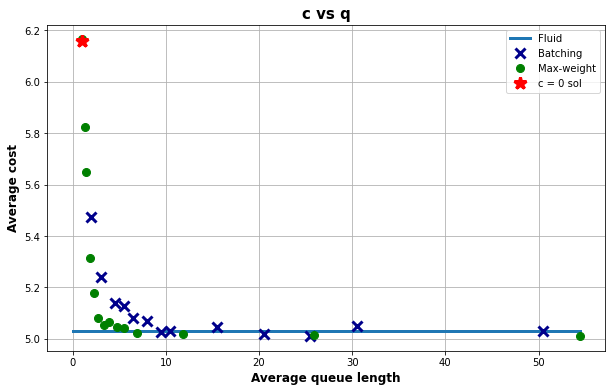

In [36]:
import pickle
frac = 0
with open('sim_paths_mw_new.pkl','rb') as f:
    Qpaths,Cpaths, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = Qpaths
C_paths_M = Cpaths
with open('sim_paths_batch.pkl','rb') as f:
    Qpaths,Cpaths, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_B = Qpaths
C_paths_B = Cpaths
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M,frac)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B,frac)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

Expected cost for c = 0 case: 6.158
[[ 2.1 10. ]
 [ 5.   3.5]]
minimize 2.1 @ var1591 + 5.0 @ var1594 + 10.0 @ var1592 + 3.5 @ var1593
subject to var1591 + var1592 == 0.6
           var1594 + var1593 == 0.4
           var1591 + var1594 == 0.3
           var1592 + var1593 == 0.7
           0.0 <= var1591
           0.0 <= var1592
           0.0 <= var1594
           0.0 <= var1593
           var1591 <= 1.0
           var1592 <= 1.0
           var1594 <= 1.0
           var1593 <= 1.0

Fluid Solution:

{'X': array([[3.0000000e-01, 3.0000000e-01],
       [2.9733875e-11, 4.0000000e-01]]), 'Cost': 5.030000000279436}


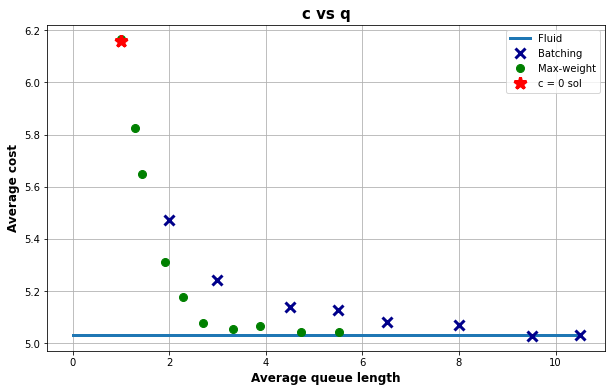

In [39]:
import pickle
frac = 0
endM = 10
endB = 8
with open('sim_paths_mw_new.pkl','rb') as f:
    Qpaths,Cpaths, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = Qpaths[0:endM][ :]
C_paths_M = Cpaths[0:endM][ :]
with open('sim_paths_batch.pkl','rb') as f:
    Qpaths,Cpaths, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_B = Qpaths[0:endB][ :]
C_paths_B = Cpaths[0:endB][ :]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M,frac)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B,frac)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

In [14]:
pmf_serv

array([0.3, 0.7])

In [24]:
x = cp.Variable((N,N)) # fraction of matchings from i to j
print(W)
constraints = []                          
for i in range(N):
    for j in range(N):
        constraints.append(x[i,j] >= 0)
        constraints.append(x[i,j] <= 1)
# inequality to avoid round off, and violating equality is anyway penalised by objective
for i in range(N):
    constraints.append(cp.sum(x[i,:]) == pmf_cust[i] ) 
for j in range(N):
    constraints.append(cp.sum(x[:,j]) == pmf_serv[j] )                      

objective = cp.Minimize( cp.sum( cp.multiply( x , W ) ) )
problem = cp.Problem(objective, constraints)
problem.solve()  
print(problem)

[[ 2.1 10. ]
 [ 5.   3.5]]
minimize Sum(var831 @ [[ 2.1 10. ]
 [ 5.   3.5]], None, False)
subject to 0.0 <= var831[0, 0]
           var831[0, 0] <= 1.0
           0.0 <= var831[0, 1]
           var831[0, 1] <= 1.0
           0.0 <= var831[1, 0]
           var831[1, 0] <= 1.0
           0.0 <= var831[1, 1]
           var831[1, 1] <= 1.0
           Sum(var831[0, 0:2], None, False) == 0.6
           Sum(var831[1, 0:2], None, False) == 0.4
           Sum(var831[0:2, 0], None, False) == 0.3
           Sum(var831[0:2, 1], None, False) == 0.7


In [25]:
N = 2
W = np.asarray([[2.1,10],[5,3.5]])
arrival_ids = np.arange(0,N,1)
pmf_cust = np.asarray([0.6, 0.4])
pmf_serv = np.asarray([0.3, 0.7])

In [26]:
print(problem.value)

5.030000000279436


In [27]:
print(x.value)

[[3.00000000e-01 3.00000000e-01]
 [2.97339742e-11 4.00000000e-01]]


In [33]:
time_steps = 10
cust_process = rv_discrete(name='cust_arr', values=(arrival_ids, pmf_cust))
serv_process = rv_discrete(name='serv_arr', values=(arrival_ids, pmf_serv))

cust_arrivals = cust_process.rvs( size = time_steps )
serv_arrivals = serv_process.rvs( size = time_steps )
alpha = 0.5
q = np.zeros(N)
q[cust_arrivals[0]] = 1
qtilde = np.zeros(N)
qtilde[serv_arrivals[0]] = 1

cost_path = [0]
total_queue = []
total_queue.append(np.sum(q))

for k in range(1,time_steps):
# Maxweight Matching
    M = cp.Variable((N,N),integer=True)
    constraints = []
    for i in range(N):
        constraints.append( cp.sum(M[i,:]) <= q[i] )
        constraints.append( cp.sum(M[:,i]) <= qtilde[i] )
    constraints.append( M[:,:]>=0 )

    objective = cp.Maximize( cp.sum( (1-alpha)*( cp.multiply( q, cp.sum(M, axis=1) ) 
                                                + cp.multiply( qtilde, cp.sum(M, axis=0) ) ) )
                            - cp.sum( alpha*cp.multiply( W,M  ) )  )
    problem  = cp.Problem(objective, constraints)         
    problem.solve()
    print("q=",q)
    print("qtilde=",qtilde)
    print(problem)


    # Check arrivals
    a = np.zeros(N)
    atilde = np.zeros(N)

    a[cust_arrivals[k]] = 1
    atilde[serv_arrivals[k]] = 1
    # State Update
    Mstar = M.value
    print("M=", Mstar)
    matching_cost = np.sum(np.multiply(Mstar,W)) 
    q = q + a - np.sum(Mstar, 1)
    qtilde = qtilde + atilde - np.sum(Mstar,0)

    total_queue.append(np.sum(q))
    cost_path.append(matching_cost)


q= [0. 1.]
qtilde= [0. 1.]
maximize Sum(Promote(0.5, (2,)) @ ([0. 1.] @ Sum(var3692, 1, False) + [0. 1.] @ Sum(var3692, 0, False)), None, False) + -Sum(Promote(0.5, (2, 2)) @ [[ 2.1 10. ]
 [ 5.   3.5]] @ var3692, None, False)
subject to Sum(var3692[0, 0:2], None, False) <= 0.0
           Sum(var3692[0:2, 0], None, False) <= 0.0
           Sum(var3692[1, 0:2], None, False) <= 1.0
           Sum(var3692[0:2, 1], None, False) <= 1.0
           0.0 <= var3692[0:2, 0:2]
M= [[-0. -0.]
 [-0. -0.]]
q= [1. 1.]
qtilde= [1. 1.]
maximize Sum(Promote(0.5, (2,)) @ ([1. 1.] @ Sum(var3791, 1, False) + [1. 1.] @ Sum(var3791, 0, False)), None, False) + -Sum(Promote(0.5, (2, 2)) @ [[ 2.1 10. ]
 [ 5.   3.5]] @ var3791, None, False)
subject to Sum(var3791[0, 0:2], None, False) <= 1.0
           Sum(var3791[0:2, 0], None, False) <= 1.0
           Sum(var3791[1, 0:2], None, False) <= 1.0
           Sum(var3791[0:2, 1], None, False) <= 1.0
           0.0 <= var3791[0:2, 0:2]
M= [[-0. -0.]
 [-0. -0.]]
q= [2. 1

### Generating weight Matrix - Spatial

In [17]:
import numpy as np
N = 6
lengths = int(N/2)
X = np.arange(1,N,2)
Y = np.arange(1,N,2)

In [33]:
N_grid = 2
lengths = int(N_grid/2)
X = np.arange(0.5,N_grid,1)
Y = np.arange(0.5,N_grid,1)
cell_locs = []
for i in range(N_grid):
    for j in range(N_grid):
        cell_locs.append([X[i],Y[j]])
N_cells = N_grid*N_grid
Weights = np.zeros(shape=(N_cells,N_cells))

for i in range(N_cells):
    for j in range(N_cells):
        Weights[i,j] = np.sqrt((cell_locs[i][0] - cell_locs[j][0])**2 + (cell_locs[i][1] - cell_locs[j][1])**2)
print(Weights)

[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]


In [39]:
N = 2
pmf_cust = np.random.rand(N*N,1)
pmf_cust = pmf_cust/(np.sum(pmf_cust))
print(pmf_cust)

[[0.22346721]
 [0.16620877]
 [0.31575429]
 [0.29456972]]


In [40]:
np.sum(pmf_cust)

1.0

In [18]:
cell_locs = []
for i in range(lengths):
  for j in range(lengths):
    cell_locs.append([X[i],Y[j]])
N_cells = lengths*lengths


Weights = np.zeros(shape=(N_cells,N_cells))
for i in range(N_cells):
  for j in range(N_cells):
    Weights[i,j] = np.sqrt((cell_locs[i][0] - cell_locs[j][0])**2 + (cell_locs[i][1] - cell_locs[j][1])**2)
print(Weights)

[[0.         2.         4.         2.         2.82842712 4.47213595
  4.         4.47213595 5.65685425]
 [2.         0.         2.         2.82842712 2.         2.82842712
  4.47213595 4.         4.47213595]
 [4.         2.         0.         4.47213595 2.82842712 2.
  5.65685425 4.47213595 4.        ]
 [2.         2.82842712 4.47213595 0.         2.         4.
  2.         2.82842712 4.47213595]
 [2.82842712 2.         2.82842712 2.         0.         2.
  2.82842712 2.         2.82842712]
 [4.47213595 2.82842712 2.         4.         2.         0.
  4.47213595 2.82842712 2.        ]
 [4.         4.47213595 5.65685425 2.         2.82842712 4.47213595
  0.         2.         4.        ]
 [4.47213595 4.         4.47213595 2.82842712 2.         2.82842712
  2.         0.         2.        ]
 [5.65685425 4.47213595 4.         4.47213595 2.82842712 2.
  4.         2.         0.        ]]


In [20]:
Weights.shape

(9, 9)

### Generating Weight Matrix - Random

In [36]:
N_grid = 4
a = np.random.rand(N_grid, N_grid)
rand_weights = np.random.rand(N_grid, N_grid)
print(rand_weights)

[[0.28338066 0.56754989 0.77080269 0.01481711]
 [0.08586285 0.07953872 0.05654574 0.34079503]
 [0.20895795 0.68254874 0.21033633 0.08395774]
 [0.23517306 0.06071984 0.19550994 0.97447317]]


In [11]:
N_cells = N_grid*N_grid
for counter in range(N_cells):
  for i in range(N_grid):
      for j in range(N_grid):
          for k in range(N_grid):
             rand_weights[i,j] = min(rand_weights[i,j],rand_weights[i,k] + rand_weights[k,j] )


In [12]:
rand_weights

array([[0.32083364, 0.54635051, 0.30588502, 0.99969315],
       [0.50259525, 0.7945825 , 0.80848026, 0.57915419],
       [0.01494862, 0.56129913, 0.20175529, 0.85191266],
       [0.85035753, 0.54081972, 0.92632343, 0.93198135]])

In [13]:
for i in range(N_grid):
    for j in range(N_grid):
        for k in range(N_grid):
           rand_weights[i,j] = min(rand_weights[i,j],rand_weights[i,k] + rand_weights[k,j] )

In [14]:
rand_weights

array([[0.32083364, 0.54635051, 0.30588502, 0.99969315],
       [0.50259525, 0.7945825 , 0.80848026, 0.57915419],
       [0.01494862, 0.56129913, 0.20175529, 0.85191266],
       [0.85035753, 0.54081972, 0.92632343, 0.93198135]])

### Back to plots

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
    print("\nFluid Solution:\n")
    print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

Expected cost for c = 0 case: 0.835
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x817357d8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e-02, 4e-01]
Presolve time: 0.02s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.800000e-01   0.000000e+00      0s
       3    2.3142136e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.03 seconds (0.00 work units)
Optimal objective  2.314213562e-01
Objective Value: 0.23
x:  [[0.09 0.   0.   0.1 ]
 [0.   0.23 0.   0.08]
 [0.   0.   0.41 0.01]
 [0.   0.   0.   0.08]]

Fluid Solution:

{'Cost': 

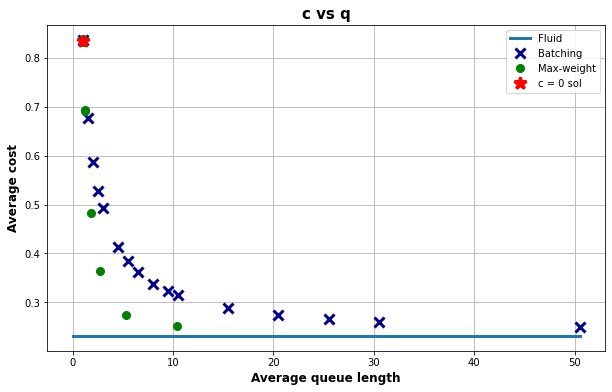

In [19]:
plot_from_sim_paths("sim_paths_spatial.pkl")

Expected cost for c = 0 case: 0.341
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xda645c90
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e-02, 4e-01]
Presolve time: 0.03s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3470507e-01   1.280000e+00   0.000000e+00      0s
       4    2.6600024e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.04 seconds (0.00 work units)
Optimal objective  2.660002396e-01
Objective Value: 0.27
x:  [[0.   0.   0.1  0.09]
 [0.   0.   0.31 0.  ]
 [0.01 0.23 0.   0.18]
 [0.08 0.   0.   0.  ]]

Fluid Solution:

{'Cost': 

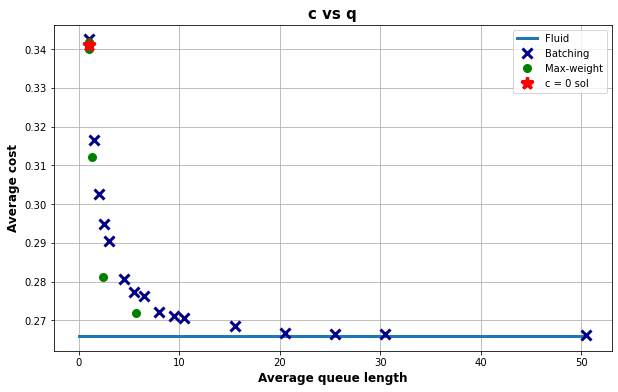

In [20]:
plot_from_sim_paths("sim_paths_random.pkl")

In [23]:
with open("sim_paths_random.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
print(N, W, pmf_cust, pmf_serv)

4 [[0.20905745 0.56418628 0.27388864 0.04863301]
 [0.1793404  0.64312121 0.2053665  0.01891596]
 [0.25420689 0.43775471 0.52809553 0.3028399 ]
 [0.16042444 0.72461073 0.43431309 0.20905745]] [0.19, 0.31, 0.42, 0.08] [0.09, 0.23, 0.41, 0.27]


In [24]:
with open("sim_paths_spatial.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
print( N, W, pmf_cust, pmf_serv)

4 [[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]] [0.19, 0.31, 0.42, 0.08] [0.09, 0.23, 0.41, 0.27]


Expected cost for c = 0 case: 4.001
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x996df94b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e-02, 4e-01]
Presolve time: 0.02s
Presolved: 8 rows, 16 columns, 32 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1550463e+00   8.200000e-01   0.000000e+00      0s
       2    3.4944399e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.08 seconds (0.00 work units)
Optimal objective  3.494439860e+00
Objective Value: 3.49
x:  [[0.   0.   0.   0.19]
 [0.09

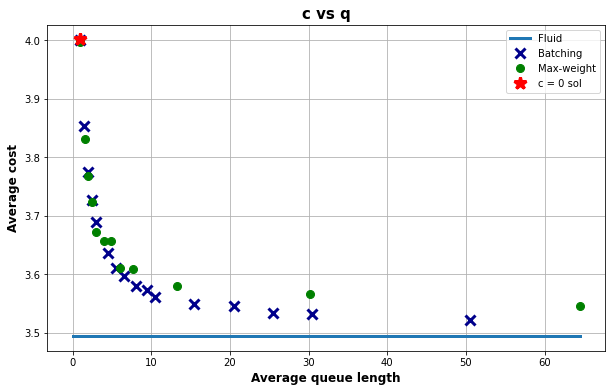

In [3]:
plot_from_sim_paths("sim_paths_random_4.pkl")

Expected cost for c = 0 case: 2.053
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0xcd695ad1
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-03, 1e-01]
Presolve time: 0.05s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.291625e-01   0.000000e+00      0s
      22    4.6844441e-01   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.08 seconds (0.00 work units)
Optimal objective  4.684444113e-01
Objective Value: 0.47
x:  [[0.0079288  0.       

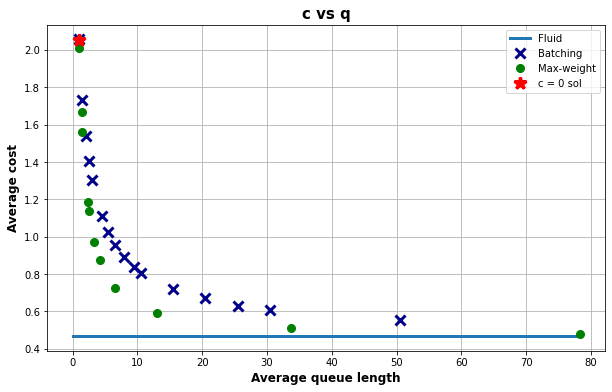

In [3]:
plot_from_sim_paths("sim_paths_spatial_4.pkl")

Expected cost for c = 0 case: 3.34
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x40fcf4a4
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-02, 5e-01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.03s
Presolved: 7 rows, 15 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6330622e+00   1.109701e+00   0.000000e+00      0s
       4    2.9525432e+00   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.06 seconds (0.00 work units)
Optimal objective  2.952543210e+00
Objective Value: 2.95
x:  [[0.02336667 0.         0.         0.        ]
 [0.0298805  0.35229149 0.14130576 0

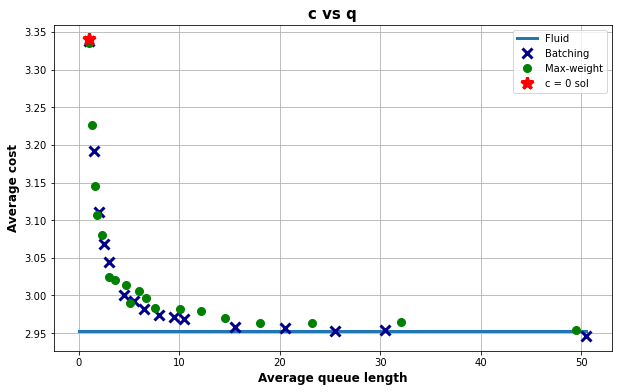

In [4]:
plot_from_sim_paths("sim_paths_random_4_random_pmf.pkl")

In [5]:
file_name = 'sim_paths_random_4_random_pmf.pkl'
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [6]:
W

array([[2.17037135, 2.69729681, 1.68559469, 2.12560222],
       [3.53744788, 3.6508647 , 1.73814782, 3.3705261 ],
       [1.79930005, 1.91271687, 3.48489474, 3.42361234],
       [4.04728398, 3.90307957, 4.26768285, 2.37568203]])

In [7]:
1.3738 + 1.799

3.1727999999999996

In [10]:
N_grid = 4
rand_weights = W
N_cells = N_grid*N_grid
for counter in range(N_cells):
    for i in range(N_grid):
        for j in range(N_grid):
            for k in range(N_grid):
                rand_weights[i,j] = min(rand_weights[i,j],rand_weights[i,k] + rand_weights[k,j] )


In [11]:
W

array([[2.17037135, 2.69729681, 1.68559469, 2.12560222],
       [3.53744788, 3.6508647 , 1.73814782, 3.3705261 ],
       [1.79930005, 1.91271687, 3.48489474, 3.42361234],
       [4.04728398, 3.90307957, 4.26768285, 2.37568203]])

In [12]:
rand_weights[1,2] + rand_weights[2,0]

3.537447875197569

Expected cost for c = 0 case: 2.046
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0x6c0eaa24
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 2e-01]
Presolve time: 0.09s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.438740e-01   0.000000e+00      0s
      21    4.7543473e-01   0.000000e+00   0.000000e+00      0s

Solved in 21 iterations and 0.22 seconds (0.00 work units)
Optimal objective  4.754347292e-01
Objective Value: 0.48
x:  [[0.01109994 0.0093929

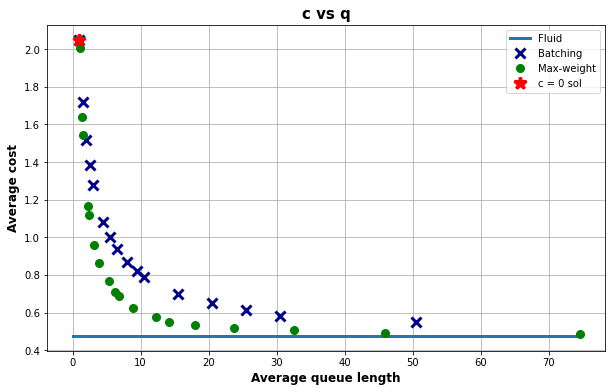

In [3]:
plot_from_sim_paths("sim_paths_spatial_4_more_maxweight.pkl")

Expected cost for c = 0 case: 2.944
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 25 columns and 50 nonzeros
Model fingerprint: 0x835e4b3c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 3e-01]
Presolve time: 0.01s
Presolved: 10 rows, 25 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0736091e+00   6.787672e-01   0.000000e+00      0s
       5    2.2288097e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.228809724e+00
Objective Value: 2.23
x:  [[0.         0.08524291 0. 

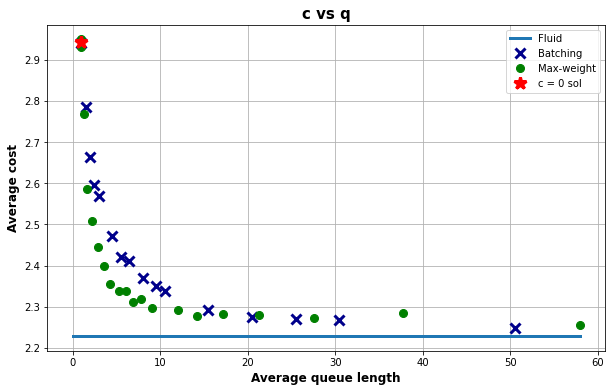

In [10]:
plot_from_sim_paths("sim_paths_random_5.pkl", 0.9)

Expected cost for c = 0 case: 2.944
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 25 columns and 50 nonzeros
Model fingerprint: 0x835e4b3c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 3e-01]
Presolve time: 0.00s
Presolved: 10 rows, 25 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0736091e+00   6.787672e-01   0.000000e+00      0s
       5    2.2288097e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.228809724e+00
Objective Value: 2.23
x:  [[0.         0.08524291 0.         0.         0.        ]
 [0.04188069 0.         0.         0.         0.25192521]
 [

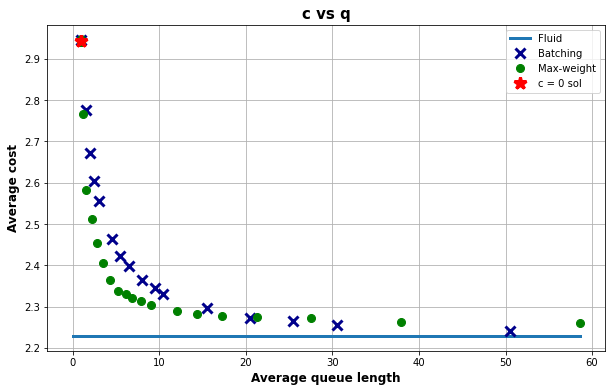

In [11]:
plot_from_sim_paths("sim_paths_random_5.pkl")

In [15]:
file_name = '../sim_paths_spatial_4_more_maxweight.pkl'
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [16]:
frac = 0
import utils
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)

In [17]:
average_cost_M

array([2.05134056, 2.04314086, 2.04711437, 2.00823716, 1.6390342 ,
       1.54269407, 1.16405191, 1.11830597, 0.95766237, 0.86380141,
       0.76891823, 0.7076005 , 0.6903933 , 0.62665715, 0.57594168,
       0.55016272, 0.53218523, 0.51858648, 0.50610701, 0.48963726,
       0.48508205])

In [18]:
import pandas as pd
alpha_values = alpha_values = np.asarray( [0, 0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.8, 0.825, 0.85, 0.875,  0.9, 0.925, 0.95] )
maxweight = pd.DataFrame({'average_queue': average_queue_M, 'average_cost': list(average_cost_M)}, columns=['average_queue', 'average_cost'])
maxweight['alpha_values'] = alpha_values
maxweight = maxweight[['alpha_values', 'average_queue', 'average_cost']]
display(maxweight)

,alpha_values,average_queue,average_cost
0,0.000,1.00000,2.051341
1,0.200,1.00000,2.043141
2,0.250,1.00000,2.047114
3,0.350,1.02958,2.008237
4,0.400,1.38767,1.639034
5,0.450,1.49887,1.542694
6,0.500,2.28548,1.164052
7,0.550,2.40674,1.118306
8,0.600,3.12880,0.957662
9,0.650,3.85840,0.863801


In [23]:
alpha_values = np.asarray( [0, 0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8,0.9,0.95] )

In [24]:
alpha_values.shape

(14,)

Expected cost for c = 0 case: 2.046
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0x6c0eaa24
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 2e-01]
Presolve time: 0.03s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.438740e-01   0.000000e+00      0s
      21    4.7543473e-01   0.000000e+00   0.000000e+00      0s

Solved in 21 iterations and 0.05 seconds (0.00 work units)
Optimal objective  4.754347292e-01
Objective Value: 0.48
x:  [[0.01109994 0.00939293 0.         0.         0.         0.
  0.         0.         0.01212069 0.         0.     

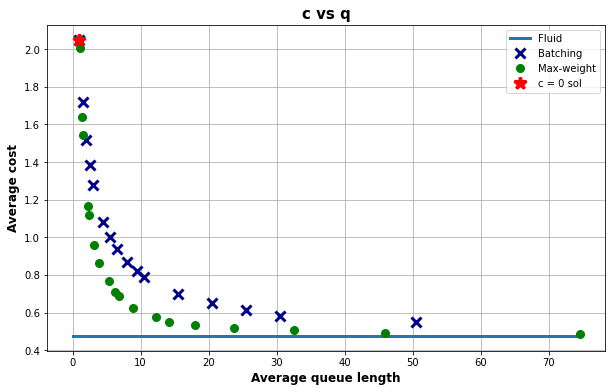

In [25]:
plot_from_sim_paths('sim_paths_spatial_4_more_maxweight.pkl')

In [9]:
pmf_serv

array([0.01109994, 0.1707595 , 0.07801194, 0.00724217, 0.02068965,
       0.04387873, 0.07057284, 0.03361351, 0.03494201, 0.07615675,
       0.05816386, 0.05760885, 0.14343739, 0.07615195, 0.00129312,
       0.1163778 ])

Expected cost for c = 0 case: 2.053
Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-03
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0xcd695ad1
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e-03, 1e-01]
Presolve time: 0.03s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.291625e-01   0.000000e+00      0s
      22    4.6844441e-01   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.05 seconds (0.00 work units)
Optimal objective  4.684444113e-01
Objective Value: 0.47
x:  [[0.0079288  0.       

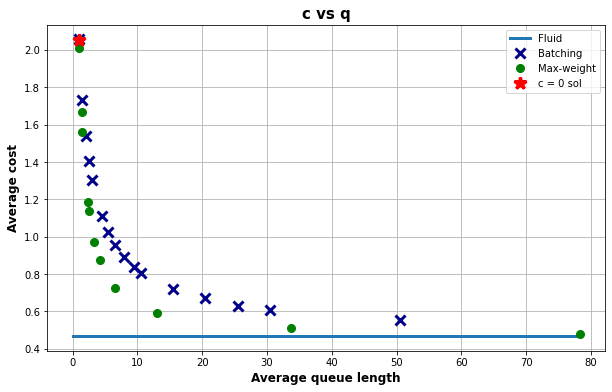

In [4]:
plot_from_sim_paths('../sim_paths_spatial_4.pkl')

In [36]:
frac = 0
with open('../sim_paths_spatial_4_more_maxweight.pkl','rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
with open('../sim_paths_spatial_rem.pkl','rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M2, average_queue_M2) = utils.average_paths(C_paths_M,Q_paths_M, frac)
(average_cost_B2, average_queue_B2) = utils.average_paths(C_paths_B,Q_paths_B, frac)
with open('../sim_paths_spatial_4_extras.pkl','rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M3, average_queue_M3) = utils.average_paths(C_paths_M,Q_paths_M, frac)
(average_cost_B3, average_queue_B3) = utils.average_paths(C_paths_B,Q_paths_B, frac)

Expected cost for c = 0 case: 2.046
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 32 rows, 256 columns and 512 nonzeros
Model fingerprint: 0x6c0eaa24
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-03, 2e-01]
Presolve time: 0.00s
Presolved: 32 rows, 256 columns, 512 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.438740e-01   0.000000e+00      0s
      21    4.7543473e-01   0.000000e+00   0.000000e+00      0s

Solved in 21 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.754347292e-01
Objective Value: 0.48
x:  [[0.01109994 0.00939293 0.         0.         0.         0.
  0.         0.         0.01212069 0.         0.     

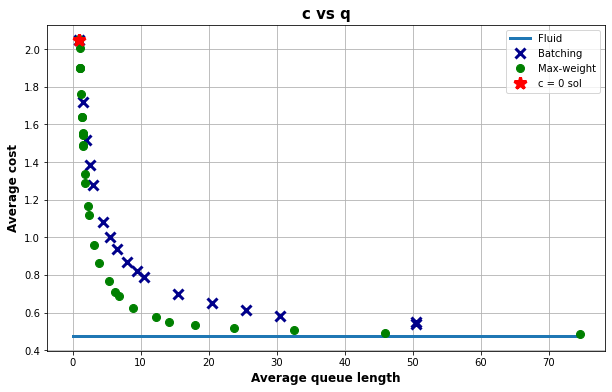

In [37]:
avg_cost_M = np.concatenate( (average_cost_M, average_cost_M2, average_cost_M3) )
avg_queue_M = np.concatenate( (average_queue_M, average_queue_M2, average_queue_M3) )
avg_cost_B = np.concatenate( (average_cost_B, average_cost_B2) )
avg_queue_B = np.concatenate( (average_queue_B, average_queue_B2) )
utils.qc_plot(Ex,fluid_sol,avg_queue_B,avg_cost_B,avg_queue_M,avg_cost_M)

In [38]:
avg_cost_M.shape

(33,)

In [6]:
average_queue_M2

array([1.1142 , 1.11377, 1.11723, 1.2524 , 1.3868 , 1.48445, 1.48606,
       1.49596])

In [9]:
W

array([[0.        , 1.        , 2.        , 3.        , 1.        ,
        1.41421356, 2.23606798, 3.16227766, 2.        , 2.23606798,
        2.82842712, 3.60555128, 3.        , 3.16227766, 3.60555128,
        4.24264069],
       [1.        , 0.        , 1.        , 2.        , 1.41421356,
        1.        , 1.41421356, 2.23606798, 2.23606798, 2.        ,
        2.23606798, 2.82842712, 3.16227766, 3.        , 3.16227766,
        3.60555128],
       [2.        , 1.        , 0.        , 1.        , 2.23606798,
        1.41421356, 1.        , 1.41421356, 2.82842712, 2.23606798,
        2.        , 2.23606798, 3.60555128, 3.16227766, 3.        ,
        3.16227766],
       [3.        , 2.        , 1.        , 0.        , 3.16227766,
        2.23606798, 1.41421356, 1.        , 3.60555128, 2.82842712,
        2.23606798, 2.        , 4.24264069, 3.60555128, 3.16227766,
        3.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 0.        ,
        1.        , 2.        , 

In [41]:
import pandas as pd
alpha_values = alpha_values = np.asarray( [0, 0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.8, 0.825, 0.85, 0.875,  0.9, 0.925, 0.95, 0.36, 0.37, 0.38,  0.39, 0.41, 0.42, 0.43, 0.44, 0.46, 0.47, 0.48, 0.49] )
maxweight = pd.DataFrame({'average_queue': avg_queue_M, 'average_cost': list(avg_cost_M)}, columns=['average_queue', 'average_cost'])
maxweight['alpha_values'] = alpha_values
maxweight = maxweight[['alpha_values', 'average_queue', 'average_cost']]
maxweight.head()

,alpha_values,average_queue,average_cost
0,0.00,1.00000,2.051341
1,0.20,1.00000,2.043141
2,0.25,1.00000,2.047114
3,0.35,1.02958,2.008237
4,0.40,1.38767,1.639034


In [47]:
maxweight['c'] = maxweight['alpha_values']/(1 - maxweight['alpha_values'])
maxweight = maxweight[['alpha_values', 'c', 'average_queue', 'average_cost']]
maxweight.sort_values('alpha_values',ignore_index=True)

,alpha_values,c,average_queue,average_cost
0,0.000,0.000000,1.00000,2.051341
1,0.200,0.250000,1.00000,2.043141
2,0.250,0.333333,1.00000,2.047114
3,0.350,0.538462,1.02958,2.008237
4,0.360,0.562500,1.11420,1.901169
5,0.370,0.587302,1.11377,1.900297
6,0.380,0.612903,1.11723,1.901340
7,0.390,0.639344,1.25240,1.758973
8,0.400,0.666667,1.38767,1.639034
9,0.410,0.694915,1.38680,1.641245


In [22]:
avg_cost_M.shape

(26,)

In [27]:
average_cost_M2

array([1.90116874, 1.90029728, 1.90134036, 1.75897271, 1.64124481,
       1.54923675, 1.55219562, 1.54673459])

In [28]:
average_cost_M3

array([1.48656495, 1.48874474, 1.33819849, 1.2871313 ])

In [29]:
avg_cost_M

array([2.04928597, 2.05332349, 2.05123038, 2.0088166 , 1.66697287,
       1.56316643, 1.18528242, 1.13604505, 0.97343103, 0.87612025,
       0.7265845 , 0.59091183, 0.50934111, 0.47893433, 1.90116874,
       1.90029728, 1.90134036, 1.75897271, 1.64124481, 1.54923675,
       1.55219562, 1.54673459, 1.48656495, 1.48874474, 1.33819849,
       1.2871313 ])

In [34]:
print( average_cost_M.shape, average_cost_M2.shape, average_cost_M3.shape)

(14,) (8,) (4,)


In [35]:
alpha_values = np.asarray( [0, 0.2, 0.25, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.675, 0.7, 0.725, 0.75, 0.8, 0.825, 0.85, 0.875,  0.9, 0.925, 0.95] ) 
print(alpha_values.shape)

(21,)
